In [527]:
#import libraries
#data
import sklearn
from sklearn.datasets import load_breast_cancer

#array/dataframe
import numpy as np 
import pandas as pd

#visualization/plotting
import seaborn as sns
import matplotlib.pyplot as plt

#feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SequentialFeatureSelector

#data split
from sklearn.model_selection import train_test_split

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#evaluation metrics
from sklearn.metrics import accuracy_score

**Q1) Load the breast_cancer dataset and create a dataframe.**

In [530]:
#load breast cancer dataset 
bc_data = load_breast_cancer()

In [532]:
#create dataframe with features and target labels (0 = malignant, 1 = benign)
df = pd.DataFrame(bc_data.data, columns = bc_data.feature_names)
df['target'] = bc_data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**Q2) Visualize feature distributions and correlations. Which features do you think will perform best for classification?**

In [535]:
#find the correlation between features and target values
bc_corr = df.corr()

#display the best correlation with the target (malignant vs benign) in descending order
#values cloest to 1 or -1 have the strongest correlation
print(bc_corr['target'].sort_values(ascending = False))

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

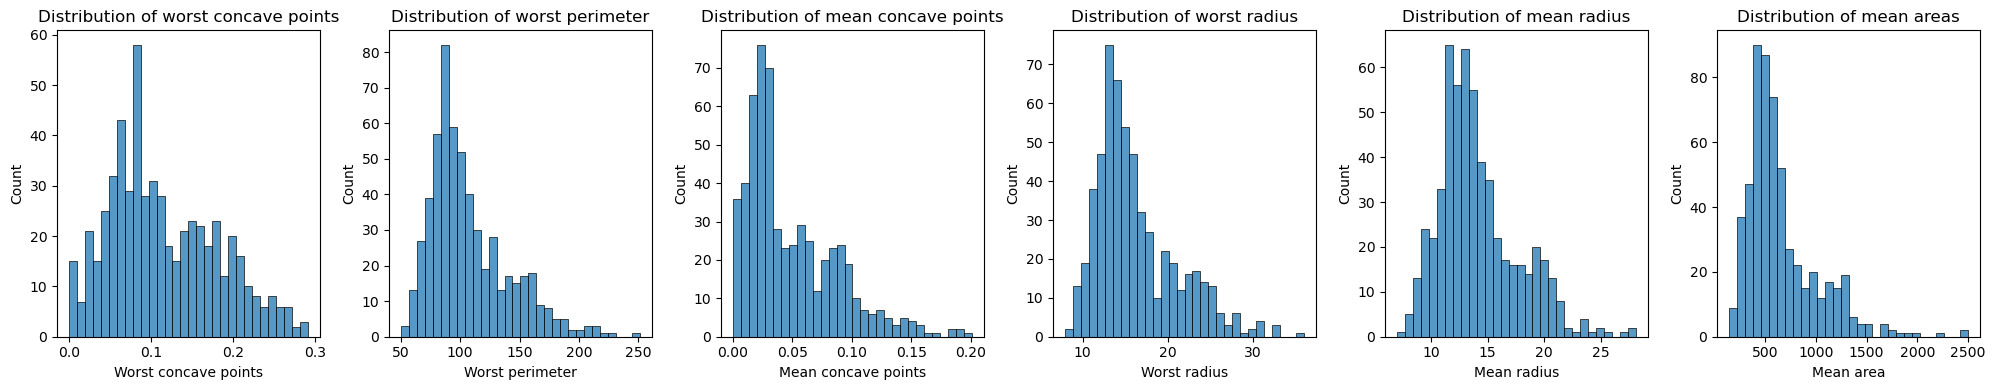

In [537]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (20, 4))

sns.histplot(df['worst concave points'], bins = 30, ax = ax1)
ax1.set_title('Distribution of worst concave points')
ax1.set_xlabel('Worst concave points')

sns.histplot(df['worst perimeter'], bins = 30, ax = ax2)
ax2.set_title('Distribution of worst perimeter')
ax2.set_xlabel('Worst perimeter')

sns.histplot(df['mean concave points'], bins = 30, ax = ax3)
ax3.set_title('Distribution of mean concave points')
ax3.set_xlabel('Mean concave points')

sns.histplot(df['worst radius'], bins = 30, ax = ax4)
ax4.set_title('Distribution of worst radius')
ax4.set_xlabel('Worst radius')

sns.histplot(df['mean radius'], bins = 30, ax = ax5)
ax5.set_title('Distribution of mean radius')
ax5.set_xlabel('Mean radius')

sns.histplot(df['mean area'], bins = 30, ax = ax6)
ax6.set_title('Distribution of mean areas')
ax6.set_xlabel('Mean area')

fig.tight_layout()
plt.show()

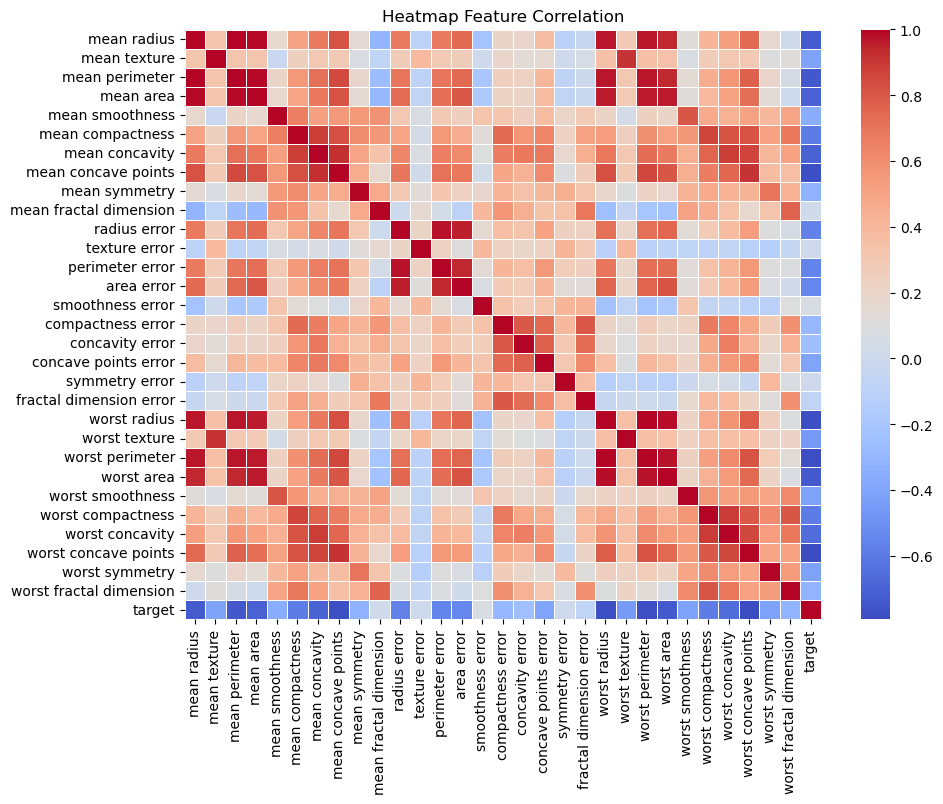

In [538]:
#create heatmap to identify highly correlated features (dark red and blue)
plt.figure(figsize=(10, 8))
sns.heatmap(bc_corr, cmap = 'coolwarm', annot = False, cbar=True, linewidths=0.5)
plt.tight_layout()
plt.title('Heatmap Feature Correlation')
plt.show()

Based on the visualizations completed above, we believe that the following features will perform best for classification: mean radius, mean perimeter, mean area, mean concave points, worst radius, worst permiter, worst area, worst concave points.

**Q3) Use a filter method to find the top 5 features.**

In [545]:
#define features (X) and target (y)
X = df[selected_features]
y = df['target']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#select top 5 features using the filter method
top_5_features = SelectKBest(f_classif, k=5).fit(X_train, y_train).get_support(indices=True)

#print selected feature names
print(X.columns[top_5_features])

Index(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'],
      dtype='object')


**Q4) Use a wrapper method to find the top 5 feature.**

In [548]:
#define features (X) and target (y)
X = df[selected_features]
y = df['target']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#select top 5 features using the wrapper method
top_5_features = SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3), 
                                           n_features_to_select=5).fit(X_train, y_train).get_support(indices=True)

#print selected feature names
print(X.columns[top_5_features])

Index(['mean radius', 'mean perimeter', 'mean area', 'worst perimeter',
       'worst area'],
      dtype='object')


**Q5) Use a random forest to estimate the importance of each feature.**

In [551]:
#define features (X) and target (y)
X = df[selected_features]
y = df['target']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#train the model using the random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

#get feature importance
importances = rf.feature_importances_

#create a dataframe to view feature and it's importance
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
})

#sort imoprtance by descending order
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

#print selected feature names
print(feature_importance_df)

                Feature  Importance
7  worst concave points    0.196893
5       worst perimeter    0.191860
3   mean concave points    0.183118
4          worst radius    0.143928
6            worst area    0.099372
1        mean perimeter    0.086697
2             mean area    0.056979
0           mean radius    0.041154


**BONUS = Find the classification accuracy for the the sets with only the top and bottom five features using any method above.**

In [554]:
#define features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

#train Random Forest and get feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X, y)

#get feature importance and sort in descending order
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

#select top 5 and bottom 5 features
top_5 = feature_importance.head(5).index.tolist()
bottom_5 = feature_importance.tail(5).index.tolist()

#split data into train and test sets for top 5 features
X_train, X_test, y_train, y_test = train_test_split(df[top_5], y, test_size=0.2, random_state=42)
#train model using the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
#evaluate model by calculating accuracy 
top_5_accuracy = accuracy_score(y_test, model.predict(X_test))

#split data into train and test sets for bottom 5 features
X_train, X_test, y_train, y_test = train_test_split(df[bottom_5], y, test_size=0.2, random_state=42)
#train model using the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
#evaluate model by calculating accuracy 
bottom_5_accuracy = accuracy_score(y_test, model.predict(X_test))

#print accuracy for top 5 and bottom 5 features
print("Top 5 Feature Accuracy:", top_5_accuracy)
print("Bottom 5 Feature Accuracy:", bottom_5_accuracy)

#display the name of the selected features
print("Top 5 Features:", top_5)
print("Bottom 5 Features:", bottom_5)

Top 5 Feature Accuracy: 0.956140350877193
Bottom 5 Feature Accuracy: 0.7982456140350878
Top 5 Features: ['worst area', 'worst concave points', 'mean concave points', 'worst radius', 'worst perimeter']
Bottom 5 Features: ['concave points error', 'texture error', 'symmetry error', 'mean symmetry', 'mean fractal dimension']
